In [1]:
import tensorflow as tf
# from tensorboard.plugins.hparams import api as hp
from tensorflow import keras

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [3]:
ratings = pd.read_pickle("./Data/small_random_selection_longform.pkl")

In [4]:
user_enc = LabelEncoder()
ratings['user'] = user_enc.fit_transform(ratings['user_id'].values)
n_users = ratings['user'].nunique()
n_users

37235

In [5]:
item_enc = LabelEncoder()
ratings['movie'] = item_enc.fit_transform(ratings['movie_id'].values)
n_movies = ratings['movie'].nunique()
n_movies

29758

In [6]:
nmovie_id = ratings.movie_id.nunique()
nuser_id = ratings.user_id.nunique()

In [7]:
X_train, X_test = train_test_split(ratings[['movie', 'user', 'rating_score']], test_size=0.3, random_state=42)

In [8]:
len(X_train)

388607

In [9]:
l2_1 = keras.regularizers.l2(.1)
l2_01 = 'l2'
l2_001 = keras.regularizers.l2(.001)

In [10]:
HP_NUM_UNITS = [32]
HP_DROPOUT = [.2, .4]
HP_LEARNING_RATE = [.1, .01]
HP_REGULARIZER = [l2_1]

In [13]:
HP_REGULARIZER

In [11]:
def train_test_model(hparams):
    
    input_movies = keras.layers.Input(shape=[1])
    embed_movies = keras.layers.Embedding(nmovie_id+1, 15)(input_movies)
    movies_out = keras.layers.Flatten()(embed_movies)

    input_users = keras.layers.Input(shape=[1])
    embed_users = keras.layers.Embedding(nuser_id+1, 15)(input_users)
    users_out = keras.layers.Flatten()(embed_users)

    conc_layer = keras.layers.Concatenate()([movies_out, users_out])
    x = keras.layers.Dense(hparams['HP_NUM_UNITS'], 
                           activation='relu', 
                           kernel_regularizer=hparams['HP_REGULARIZER'])(conc_layer)
    dropout = x = keras.layers.Dropout(rate=hparams['HP_DROPOUT'], seed=42)(x)
    x_out = x = keras.layers.Dense(1, 
                                   activation='relu',
                                  kernel_regularizer=hparams['HP_REGULARIZER'])(x)

    model = keras.Model([input_movies, input_users], x_out)
    
    opt = tf.optimizers.Adam(learning_rate=hparams['HP_LEARNING_RATE'])
    model.compile(optimizer=opt, loss='mean_squared_error', metrics = keras.metrics.RootMeanSquaredError())
    
    hist = model.fit([X_train.movie, X_train.user], 
                 X_train.rating_score,  
                 batch_size=len(X_train), epochs=100, validation_split=.2)

#     print(hist.history['val_mean_squared_error'])
    return hist

In [12]:
run_history = {}

session_num = 0

for num_units in HP_NUM_UNITS:
    for dropout_rate in HP_DROPOUT:
        for learning_rate in HP_LEARNING_RATE:
            for regularization in HP_REGULARIZER:
                hparams = {
                'HP_NUM_UNITS': num_units,
                'HP_DROPOUT': dropout_rate,
                'HP_LEARNING_RATE': learning_rate,
                'HP_REGULARIZER': regularization,
                }
                
                run_name = "run-{}".format(session_num)
                print("----Starting trial: {}".format(run_name))
                print(hparams)
                
                output = train_test_model(hparams,)
                run_history[run_name] = {
                    'params': hparams,
                    'output': output,
                }
                session_num += 1

----Starting trial: run-0
{'HP_NUM_UNITS': 32, 'HP_DROPOUT': 0.2, 'HP_LEARNING_RATE': 0.1, 'HP_REGULARIZER': <tensorflow.python.keras.regularizers.L2 object at 0x7f222a760130>}
Epoch 1/100
1/1 [==============================] - 3s 3s/step - loss: 18.6078 - root_mean_squared_error: 3.9155 - val_loss: 11.6689 - val_root_mean_squared_error: 3.2240
Epoch 2/100
1/1 [==============================] - 1s 699ms/step - loss: 11.6777 - root_mean_squared_error: 3.2254 - val_loss: 2.6780 - val_root_mean_squared_error: 1.2951
Epoch 3/100
1/1 [==============================] - 1s 512ms/step - loss: 2.7365 - root_mean_squared_error: 1.3175 - val_loss: 21.7218 - val_root_mean_squared_error: 4.4759
Epoch 4/100
1/1 [==============================] - 1s 501ms/step - loss: 23.5555 - root_mean_squared_error: 4.6763 - val_loss: 2.8601 - val_root_mean_squared_error: 1.2750
Epoch 5/100
1/1 [==============================] - 0s 433ms/step - loss: 3.1117 - root_mean_squared_error: 1.3701 - val_loss: 3.9185 - va

Epoch 48/100
1/1 [==============================] - 0s 400ms/step - loss: 0.8603 - root_mean_squared_error: 0.8375 - val_loss: 0.9734 - val_root_mean_squared_error: 0.9131
Epoch 49/100
1/1 [==============================] - 0s 351ms/step - loss: 0.8614 - root_mean_squared_error: 0.8495 - val_loss: 0.9928 - val_root_mean_squared_error: 0.9292
Epoch 50/100
1/1 [==============================] - 0s 446ms/step - loss: 0.8902 - root_mean_squared_error: 0.8722 - val_loss: 0.9654 - val_root_mean_squared_error: 0.9136
Epoch 51/100
1/1 [==============================] - 0s 386ms/step - loss: 0.8582 - root_mean_squared_error: 0.8530 - val_loss: 0.9512 - val_root_mean_squared_error: 0.9009
Epoch 52/100
1/1 [==============================] - 0s 358ms/step - loss: 0.8362 - root_mean_squared_error: 0.8346 - val_loss: 0.9822 - val_root_mean_squared_error: 0.9140
Epoch 53/100
1/1 [==============================] - 0s 355ms/step - loss: 0.8629 - root_mean_squared_error: 0.8462 - val_loss: 0.9720 - val_

Epoch 96/100
1/1 [==============================] - 0s 408ms/step - loss: 0.7560 - root_mean_squared_error: 0.8033 - val_loss: 0.9217 - val_root_mean_squared_error: 0.9015
Epoch 97/100
1/1 [==============================] - 0s 435ms/step - loss: 0.7547 - root_mean_squared_error: 0.8035 - val_loss: 0.9195 - val_root_mean_squared_error: 0.9012
Epoch 98/100
1/1 [==============================] - 0s 453ms/step - loss: 0.7535 - root_mean_squared_error: 0.8038 - val_loss: 0.9196 - val_root_mean_squared_error: 0.9013
Epoch 99/100
1/1 [==============================] - 0s 422ms/step - loss: 0.7500 - root_mean_squared_error: 0.8017 - val_loss: 0.9216 - val_root_mean_squared_error: 0.9019
Epoch 100/100
1/1 [==============================] - 0s 422ms/step - loss: 0.7517 - root_mean_squared_error: 0.8021 - val_loss: 0.9234 - val_root_mean_squared_error: 0.9025
----Starting trial: run-1
{'HP_NUM_UNITS': 32, 'HP_DROPOUT': 0.2, 'HP_LEARNING_RATE': 0.01, 'HP_REGULARIZER': <tensorflow.python.keras.regu

Epoch 90/100
1/1 [==============================] - 0s 380ms/step - loss: 1.1537 - root_mean_squared_error: 0.8626 - val_loss: 1.2418 - val_root_mean_squared_error: 0.9139
Epoch 91/100
1/1 [==============================] - 0s 402ms/step - loss: 1.1543 - root_mean_squared_error: 0.8647 - val_loss: 1.2393 - val_root_mean_squared_error: 0.9138
Epoch 92/100
1/1 [==============================] - 0s 337ms/step - loss: 1.1527 - root_mean_squared_error: 0.8651 - val_loss: 1.2365 - val_root_mean_squared_error: 0.9131
Epoch 93/100
1/1 [==============================] - 0s 419ms/step - loss: 1.1471 - root_mean_squared_error: 0.8628 - val_loss: 1.2336 - val_root_mean_squared_error: 0.9121
Epoch 94/100
1/1 [==============================] - 0s 363ms/step - loss: 1.1437 - root_mean_squared_error: 0.8614 - val_loss: 1.2309 - val_root_mean_squared_error: 0.9110
Epoch 95/100
1/1 [==============================] - 0s 400ms/step - loss: 1.1408 - root_mean_squared_error: 0.8601 - val_loss: 1.2285 - val_

Epoch 37/100
1/1 [==============================] - 0s 492ms/step - loss: 0.9990 - root_mean_squared_error: 0.9266 - val_loss: 0.9767 - val_root_mean_squared_error: 0.9056
Epoch 38/100
1/1 [==============================] - 0s 402ms/step - loss: 0.9764 - root_mean_squared_error: 0.9055 - val_loss: 1.0171 - val_root_mean_squared_error: 0.9227
Epoch 39/100
1/1 [==============================] - 0s 376ms/step - loss: 1.0225 - root_mean_squared_error: 0.9256 - val_loss: 0.9924 - val_root_mean_squared_error: 0.9140
Epoch 40/100
1/1 [==============================] - 0s 422ms/step - loss: 0.9883 - root_mean_squared_error: 0.9118 - val_loss: 0.9585 - val_root_mean_squared_error: 0.9062
Epoch 41/100
1/1 [==============================] - 0s 371ms/step - loss: 0.9441 - root_mean_squared_error: 0.8983 - val_loss: 0.9845 - val_root_mean_squared_error: 0.9291
Epoch 42/100
1/1 [==============================] - 0s 421ms/step - loss: 0.9670 - root_mean_squared_error: 0.9196 - val_loss: 0.9850 - val_

Epoch 85/100
1/1 [==============================] - 0s 383ms/step - loss: 0.8110 - root_mean_squared_error: 0.8470 - val_loss: 0.8983 - val_root_mean_squared_error: 0.8976
Epoch 86/100
1/1 [==============================] - 0s 365ms/step - loss: 0.8103 - root_mean_squared_error: 0.8472 - val_loss: 0.8974 - val_root_mean_squared_error: 0.8982
Epoch 87/100
1/1 [==============================] - 0s 364ms/step - loss: 0.8084 - root_mean_squared_error: 0.8472 - val_loss: 0.8968 - val_root_mean_squared_error: 0.8987
Epoch 88/100
1/1 [==============================] - 0s 387ms/step - loss: 0.8049 - root_mean_squared_error: 0.8460 - val_loss: 0.8959 - val_root_mean_squared_error: 0.8983
Epoch 89/100
1/1 [==============================] - 0s 392ms/step - loss: 0.8033 - root_mean_squared_error: 0.8452 - val_loss: 0.8952 - val_root_mean_squared_error: 0.8976
Epoch 90/100
1/1 [==============================] - 0s 405ms/step - loss: 0.8020 - root_mean_squared_error: 0.8441 - val_loss: 0.8945 - val_

Epoch 79/100
1/1 [==============================] - 0s 399ms/step - loss: 1.4800 - root_mean_squared_error: 1.0262 - val_loss: 1.2813 - val_root_mean_squared_error: 0.9244
Epoch 80/100
1/1 [==============================] - 0s 400ms/step - loss: 1.4729 - root_mean_squared_error: 1.0228 - val_loss: 1.2744 - val_root_mean_squared_error: 0.9208
Epoch 81/100
1/1 [==============================] - 0s 327ms/step - loss: 1.4668 - root_mean_squared_error: 1.0199 - val_loss: 1.2689 - val_root_mean_squared_error: 0.9182
Epoch 82/100
1/1 [==============================] - 0s 351ms/step - loss: 1.4678 - root_mean_squared_error: 1.0207 - val_loss: 1.2644 - val_root_mean_squared_error: 0.9165
Epoch 83/100
1/1 [==============================] - 0s 302ms/step - loss: 1.4614 - root_mean_squared_error: 1.0183 - val_loss: 1.2607 - val_root_mean_squared_error: 0.9158
Epoch 84/100
1/1 [==============================] - 0s 394ms/step - loss: 1.4590 - root_mean_squared_error: 1.0183 - val_loss: 1.2575 - val_

In [14]:
import matplotlib.pyplot as plt

In [15]:
len(run_history.keys())

4

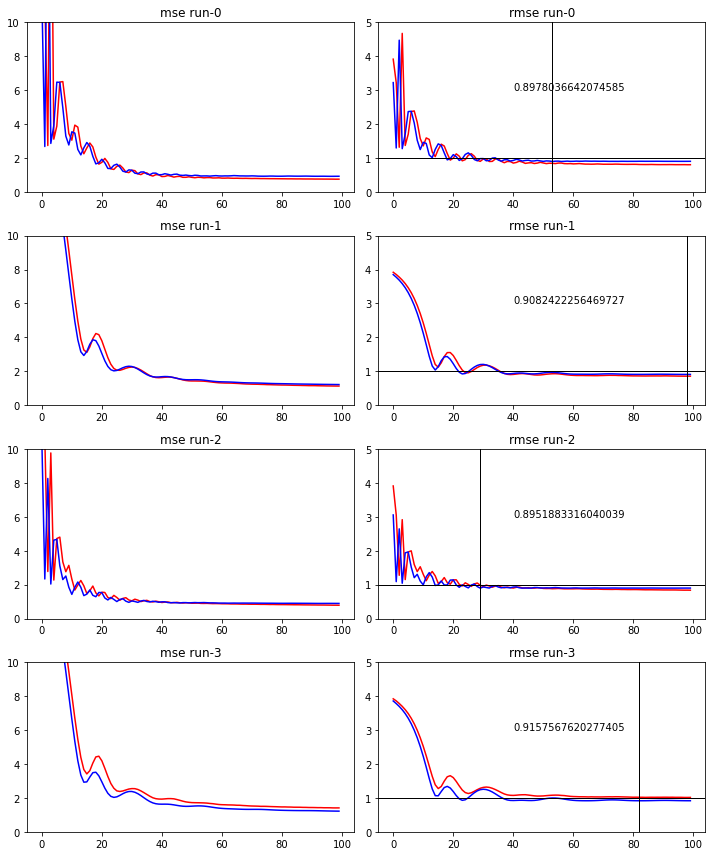

In [28]:
fig, axs = plt.subplots(ncols=2, nrows=len(run_history.keys()), figsize=(10, len(run_history.keys())*3))

for n, key in enumerate(run_history.keys()):
    axs[n,0].plot(run_history[key]['output'].history['loss'], color='r')
    axs[n,0].plot(run_history[key]['output'].history['val_loss'], color='b')
    
    axs[n,1].plot(run_history[key]['output'].history['root_mean_squared_error'], color='r')
    axs[n,1].plot(run_history[key]['output'].history['val_root_mean_squared_error'], color='b')
    axs[n,1].axvline(np.where(run_history[key]['output'].history['val_root_mean_squared_error']==np.min(run_history[key]['output'].history['val_root_mean_squared_error'])), 
                     color='k', lw=1)
    axs[n,1].annotate(str(np.min(run_history[key]['output'].history['val_root_mean_squared_error'])),
                        xy=(40,3),)
    
#     title_str = '-'.join(str(run_history[key]['params'][param]) for param in run_history[key]['params'].keys(),
#                         xytext=(.8,.8), xycoords='subfigure fraction')
    
    axs[n,0].set_title("mse {}".format(key))
    axs[n,1].set_title("rmse {}".format(key))
    
    axs[n,0].set_ylim(0,10)
    axs[n,1].set_ylim(0,5)
    
    axs[n, 1].axhline(1, color='k', lw=1)
    
plt.tight_layout()   
plt.show()

In [17]:
print(run_history['run-0'])
print(run_history['run-1'])
print(run_history['run-2'])
print(run_history['run-3'])

{'params': {'HP_NUM_UNITS': 32, 'HP_DROPOUT': 0.2, 'HP_LEARNING_RATE': 0.1, 'HP_REGULARIZER': <tensorflow.python.keras.regularizers.L2 object at 0x7f222a760130>}, 'output': <tensorflow.python.keras.callbacks.History object at 0x7f222dce4f70>}
{'params': {'HP_NUM_UNITS': 32, 'HP_DROPOUT': 0.2, 'HP_LEARNING_RATE': 0.01, 'HP_REGULARIZER': <tensorflow.python.keras.regularizers.L2 object at 0x7f222a760130>}, 'output': <tensorflow.python.keras.callbacks.History object at 0x7f22202181f0>}
{'params': {'HP_NUM_UNITS': 32, 'HP_DROPOUT': 0.4, 'HP_LEARNING_RATE': 0.1, 'HP_REGULARIZER': <tensorflow.python.keras.regularizers.L2 object at 0x7f222a760130>}, 'output': <tensorflow.python.keras.callbacks.History object at 0x7f222006b130>}
{'params': {'HP_NUM_UNITS': 32, 'HP_DROPOUT': 0.4, 'HP_LEARNING_RATE': 0.01, 'HP_REGULARIZER': <tensorflow.python.keras.regularizers.L2 object at 0x7f222a760130>}, 'output': <tensorflow.python.keras.callbacks.History object at 0x7f22006b82e0>}


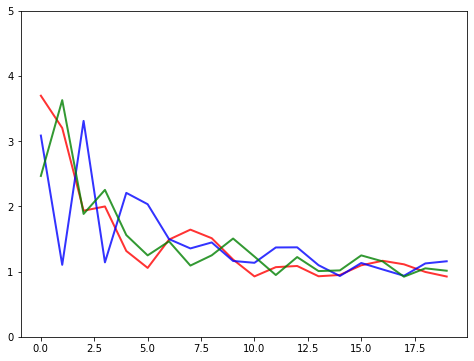

In [23]:
fig, ax = plt.subplots(figsize=(8,6))

colors = ['red', 'blue', 'green']
for n, key in enumerate(['run-0', 'run-3', 'run-6']):
    
    ax.plot(run_history[key]['output'].history['val_root_mean_squared_error'], color=colors[n], alpha=.8, lw=2)

ax.set_ylim(0,5)
plt.show()

{'params': {'HP_NUM_UNITS': 64,
  'HP_DROPOUT': 0.3,
  'HP_LEARNING_RATE': 0.1,
  'HP_REGULARIZER': <tensorflow.python.keras.regularizers.L2 at 0x7fc3be6db070>},
 'output': <tensorflow.python.keras.callbacks.History at 0x7fc3902b80d0>}

In [26]:
run_history['run-0']['params']['HP_REGULARIZER'].l2

array(0.1, dtype=float32)

In [27]:
run_history['run-1']

{'params': {'HP_NUM_UNITS': 64,
  'HP_DROPOUT': 0.3,
  'HP_LEARNING_RATE': 0.01,
  'HP_REGULARIZER': 'l2'},
 'output': <tensorflow.python.keras.callbacks.History at 0x7f4efc4fe4f0>}

In [28]:
run_history['run-1']['params']['HP_REGULARIZER'].l2

AttributeError: 'str' object has no attribute 'l2'

In [29]:
import json
def export_history(run_history, batch_size, n_epochs, save_path):
    history_dict = run_history.copy()
    for key in history_dict:
        if history_dict[key]['params']['HP_REGULARIZER']=='l2':
            
            history_dict[key]['params']['HP_REGULARIZER'] = .01
        else:
            try:
                history_dict[key]['params']['HP_REGULARIZER'] = history_dict[key]['params']['HP_REGULARIZER'].l2.tolist()
            except:
                pass   
        if type(history_dict[key]['params']['HP_REGULARIZER']) == np.ndarray:
            history_dict[key]['params']['HP_REGULARIZER'] = history_dict[key]['params']['HP_REGULARIZER'].tolist()
        history_dict[key]['params']['batch_size'] = batch_size
        history_dict[key]['params']['n_epochs'] = n_epochs
        
        try:
            history_dict[key]['output'] = history_dict[key]['output'].history
        except:
            history_dict[key]['output'] = history_dict[key]['output']
      
    with open(save_path, 'w') as f:
        json.dump(history_dict, f)
    
    return history_dict

new_dict = export_history(run_history, len(X_train), 100, "./run_history/model8.json")